In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("/content/Demographic Health Dataset.xlsx",
sheet_name="dataset")

In [ ]:
data

,age,income,height,weight,score,gender,target_class
0,53.314588,46154.444558,163.419921,76.123791,63,Female,Healthy
1,17.966176,60062.928092,160.731189,44.461246,79,Male,Healthy
2,34.444523,44231.081305,154.878956,85.437335,99,Male,Healthy
3,38.840654,58356.921121,148.451433,77.088962,53,Male,Unhealthy
4,34.673053,38702.931453,173.231706,73.840446,67,Female,Unhealthy
...,...,...,...,...,...,...,...
95,34.339202,150000.000000,168.475817,62.157100,67,Female,Healthy
96,22.889838,180000.000000,159.602403,63.697198,55,NaN,Unhealthy
97,28.481639,200000.000000,157.216953,65.773231,86,Female,Healthy
98,35.473987,250000.000000,166.958453,150.000000,97,Male,Healthy


## Explore the data

In [ ]:
# View the summary statistics of the numeric columns in the dataset
data.describe()

,age,income,height,weight,score
count,95.000000,97.000000,98.000000,98.000000,100.000000
mean,33.702332,59733.807283,163.793065,73.594387,73.680000
std,9.730129,39816.965650,10.086378,19.716504,15.405548
min,11.980788,25283.554999,138.031134,42.386887,50.000000
25%,26.391512,45406.391005,157.892797,61.711524,59.750000
50%,33.876720,52544.208433,163.488158,72.247831,73.500000
75%,40.214783,58696.059201,170.671696,83.135555,86.250000
max,65.788808,300000.000000,190.733598,180.000000,99.000000


In [ ]:
# View a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           95 non-null     float64
 1   income        97 non-null     float64
 2   height        98 non-null     float64
 3   weight        98 non-null     float64
 4   score         100 non-null    int64  
 5   gender        95 non-null     object 
 6   target_class  100 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ KB


In [ ]:
# View the distribution of values in a categorical column
data['gender'].value_counts()

,count
gender,
Male,50
Female,45


In [ ]:
# Count unique values in a categorical column
data['gender'].nunique()

2

In [ ]:
# Identify all categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object','category']).columns
# View the categorical columns
print("Categorical columns:")
print(categorical_columns)
# Count unique values in each categorical column
for col in categorical_columns:
 print(f"\nColumn: {col}")
 print(data[col].value_counts())

Categorical columns:
Index(['gender', 'target_class'], dtype='object')

Column: gender
gender
Male      50
Female    45
Name: count, dtype: int64

Column: target_class
target_class
Unhealthy    56
Healthy      44
Name: count, dtype: int64


## Identify & Replace missing value

In [ ]:
# Count missing values in each column
data.isnull().sum()

,0
age,5
income,3
height,2
weight,2
score,0
gender,5
target_class,0


In [ ]:
# Replace missing values in the 'age' column with the mean of the column
data['age'] = data['age'].fillna(data['age'].mean())
# Replace missing values in the 'income' column with the mean of the column
data['income'] = data['income'].fillna(data['income'].mean())
# Replace missing values in the 'gender' column with the mode (most frequent value)
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
# Replace missing values in the 'weight' column witha specific value, e.g., 70
data['weight'] = data['weight'].fillna(70)

In [ ]:
# Replace missing values in multiple columns
data.fillna({
 'age': data['age'].mean(),
 'income': data['income'].mean(),
 'gender': data['gender'].mode()[0]
}, inplace=True)

In [ ]:
# Replace missing values in 'age' by mean within each 'target_class'
data['age'] = data.groupby('target_class')['age'].transform(lambda x:x.fillna(x.mean()))
# Similarly for 'income'
data['income'] = data.groupby('target_class')['income'].transform(lambda x:x.fillna(x.mean()))
# Similarly for 'height'
data['height'] = data.groupby('target_class')['height'].transform(lambda x:x.fillna(x.mean()))

In [ ]:
# recheck missing values in each column
data.isnull().sum()

,0
age,0
income,0
height,0
weight,0
score,0
gender,0
target_class,0


In [ ]:
# Save the preprocessed data to excel
data.to_excel("preprocessed_Data2.xlsx", index=False)

## Outlier-with box plot (matplotlib)

In [ ]:
import matplotlib.pyplot as plt

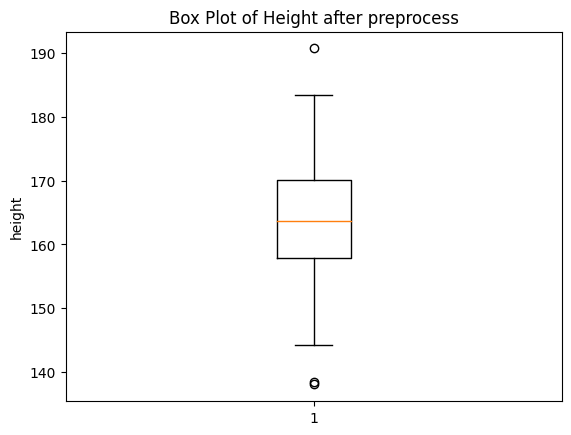

In [ ]:
# Create a box plot for a specific column (e.g.,'income')
plt.boxplot(data['height'].dropna()) # Drop missing values to avoid issues
plt.title('Box Plot of Height after preprocess')
plt.ylabel('height')
plt.show()

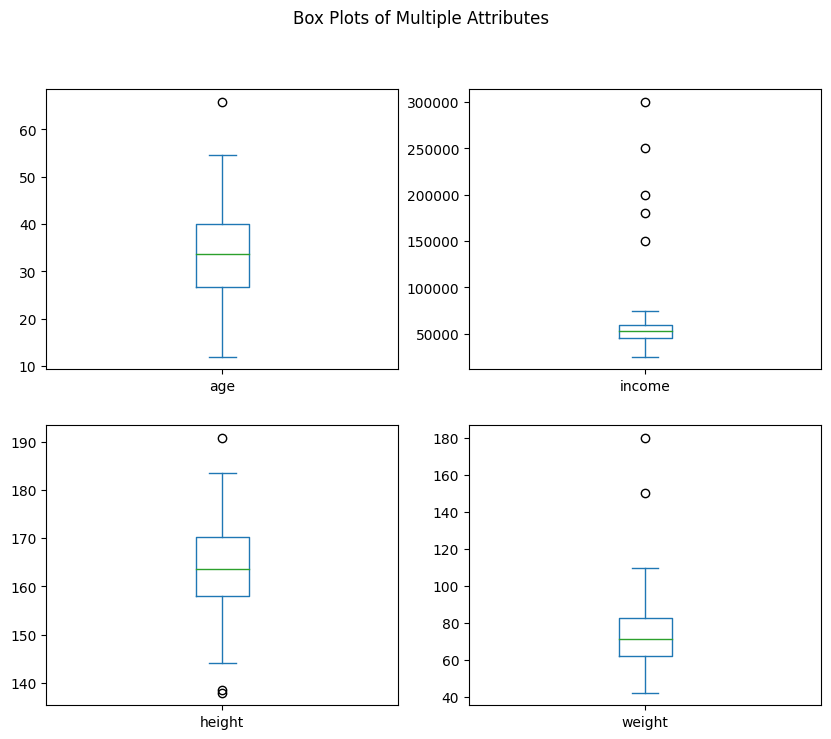

In [ ]:
# Create box plots for multiple numerical columns using matplotlib
data[['age', 'income', 'height', 'weight']].plot(kind='box',
subplots=True, layout=(2, 2), figsize=(10, 8))
plt.suptitle('Box Plots of Multiple Attributes')
plt.show()

## Log Transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")

In [ ]:
# Assume we are focusing on the 'height' column, which may contain outliers
# Step 1: Apply log transformation to the 'height' column
# Ensure that all values are positive before applying log transformation
data['height_log'] = np.log(data['height'].clip(lower=1)) # clip to avoid log(0)

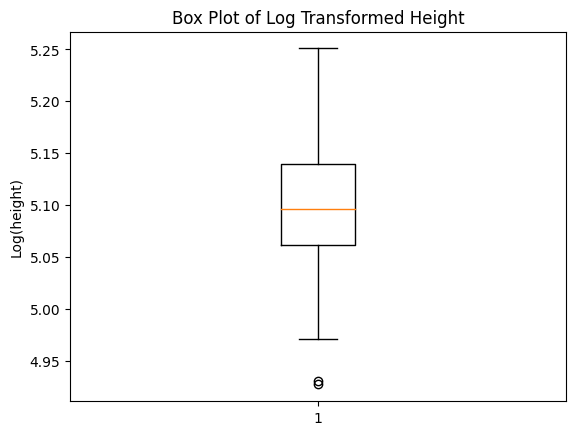

In [ ]:
# Step 2: Plot the box plot of the transformed 'height_log' column
plt.boxplot(data['height_log'].dropna())
plt.title('Box Plot of Log Transformed Height')
plt.ylabel('Log(height)')
plt.show()


In [ ]:
# Step 3: Display the updated dataset
print(data[['height', 'height_log']])

        height  height_log
0   163.419921    5.096323
1   160.731189    5.079733
2   154.878956    5.042644
3   148.451433    5.000258
4   173.231706    5.154630
..         ...         ...
95  168.475817    5.126792
96  159.602403    5.072686
97  157.216953    5.057627
98  166.958453    5.117745
99  155.216272    5.044819

[100 rows x 2 columns]


## Replace outlier with mean

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")

In [ ]:
# Assume we are focusing on the 'income' column, which may contain outliers
# Step 1: Detect Outliers using Box Plot Statistics (IQR method)
Q1 = data['height'].quantile(0.25)
Q3 = data['height'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Calculate the bounds for outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Step 2: Identify the outliers
outliers = (data['height'] < lower_bound) | (data['height'] > upper_bound)


In [ ]:
# Step 3: Replace outliers with the mean
mean_value = data['height'].mean()
data.loc[outliers, 'height'] = mean_value

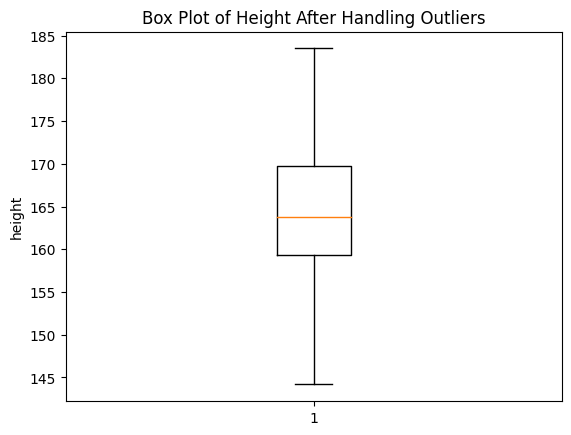

In [ ]:
# Step 4: Plot the box plot after imputing outliers
plt.boxplot(data['height'].dropna())
plt.title('Box Plot of Height After Handling Outliers')
plt.ylabel('height')
plt.show()

## Histogram

### Income

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")

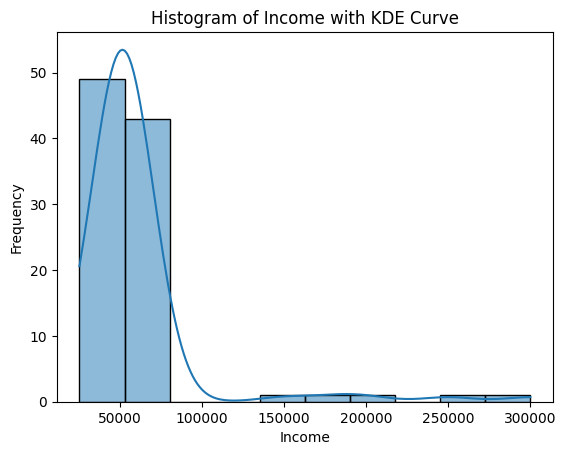

In [ ]:
# Step 1: Construct a histogram for the 'income' column with a KDE curve
sns.histplot(data['income'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve

# Step 2: Add titles and labels
plt.title('Histogram of Income with KDE Curve')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Step 3: Show the plot
plt.show()

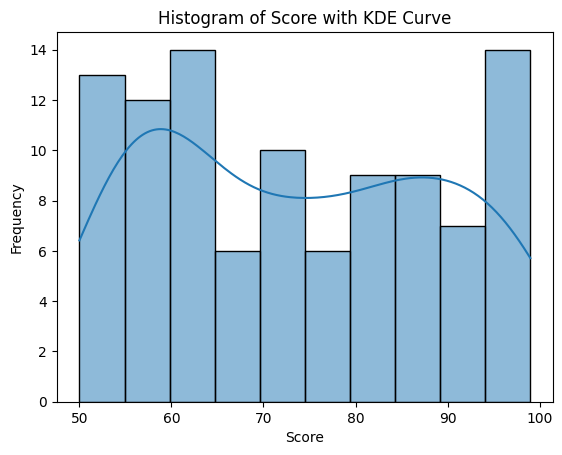

In [ ]:
# Step 1: Construct a histogram for the 'score' column with a KDE curve
sns.histplot(data['score'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve

# Step 2: Add titles and labels
plt.title('Histogram of Score with KDE Curve')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Step 3: Show the plot
plt.show()

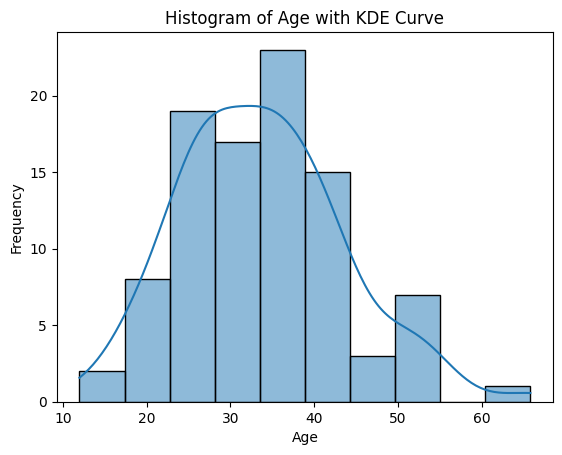

In [ ]:
# Step 1: Construct a histogram for the 'score' column with a KDE curve
sns.histplot(data['age'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve

# Step 2: Add titles and labels
plt.title('Histogram of Age with KDE Curve')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Step 3: Show the plot
plt.show()

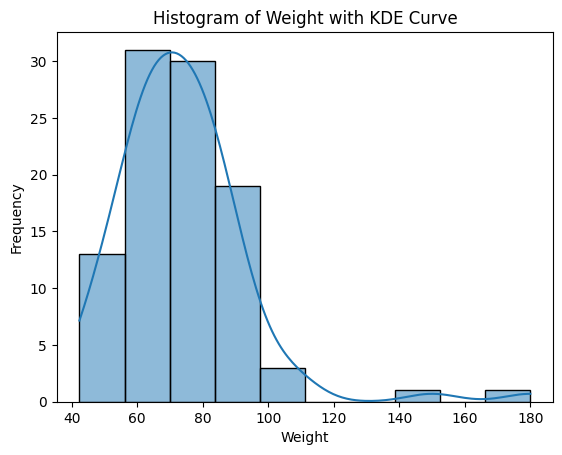

In [ ]:
# Step 1: Construct a histogram for the 'score' column with a KDE curve
sns.histplot(data['weight'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve

# Step 2: Add titles and labels
plt.title('Histogram of Weight with KDE Curve')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Step 3: Show the plot
plt.show()

## Remove Outliers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")

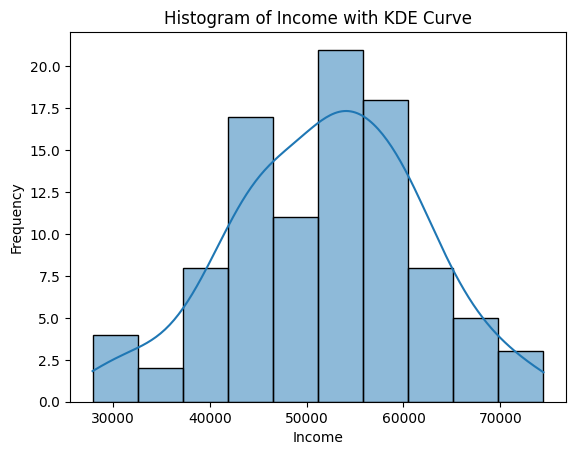

In [ ]:
# Assume we are focusing on the 'income' column, which may contain outliers
# Step 1: Detect Outliers using Box Plot Statistics (IQR method)
Q1 = data['income'].quantile(0.25)
Q3 = data['income'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify the outliers
outliers = (data['income'] < lower_bound) | (data['income'] > upper_bound)
# Step 3: Replace outliers with the mean
mean_value = data['income'].mean()
data.loc[outliers, 'income'] = mean_value

# Step 5: Construct a histogram for the 'income' column with a KDE curve
sns.histplot(data['income'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve

# Step 6: Add titles and labels
plt.title('Histogram of Income with KDE Curve')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Step 7: Show the plot
plt.show()

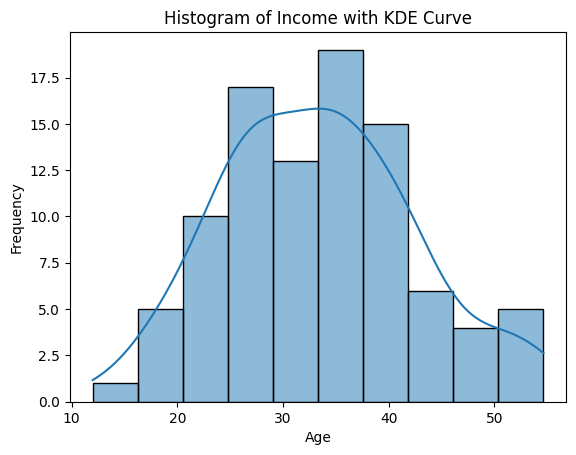

In [ ]:
# Assume we are focusing on the 'income' column, which may contain outliers
# Step 1: Detect Outliers using Box Plot Statistics (IQR method)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify the outliers
outliers = (data['age'] < lower_bound) | (data['age'] > upper_bound)
# Step 3: Replace outliers with the mean
mean_value = data['age'].mean()
data.loc[outliers, 'age'] = mean_value

# Step 5: Construct a histogram for the 'income' column with a KDE curve
sns.histplot(data['age'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve

# Step 6: Add titles and labels
plt.title('Histogram of Income with KDE Curve')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Step 7: Show the plot
plt.show()

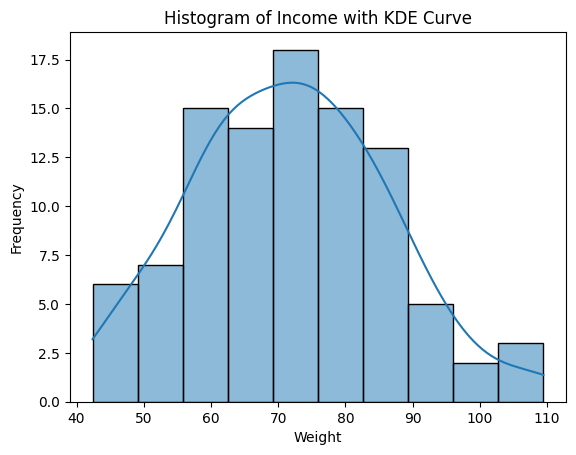

In [ ]:
# Assume we are focusing on the 'income' column, which may contain outliers
# Step 1: Detect Outliers using Box Plot Statistics (IQR method)
Q1 = data['weight'].quantile(0.25)
Q3 = data['weight'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify the outliers
outliers = (data['weight'] < lower_bound) | (data['weight'] > upper_bound)
# Step 3: Replace outliers with the mean
mean_value = data['weight'].mean()
data.loc[outliers, 'weight'] = mean_value

# Step 5: Construct a histogram for the 'income' column with a KDE curve
sns.histplot(data['weight'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve

# Step 6: Add titles and labels
plt.title('Histogram of Income with KDE Curve')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Step 7: Show the plot
plt.show()

## Outlier-with box plot (seaborn)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

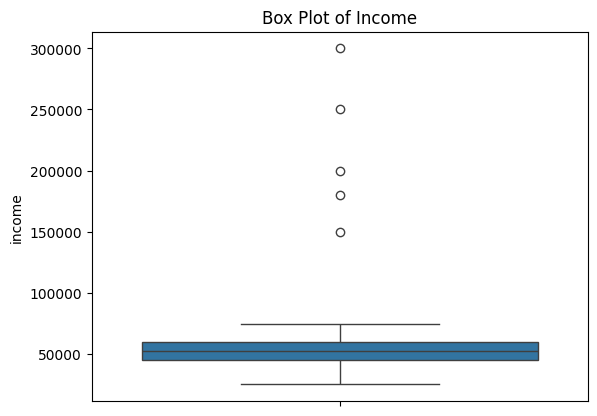

In [ ]:
# Create a vertical box plot for 'income'
sns.boxplot(y=data['income'])
plt.title('Box Plot of Income')
plt.show()

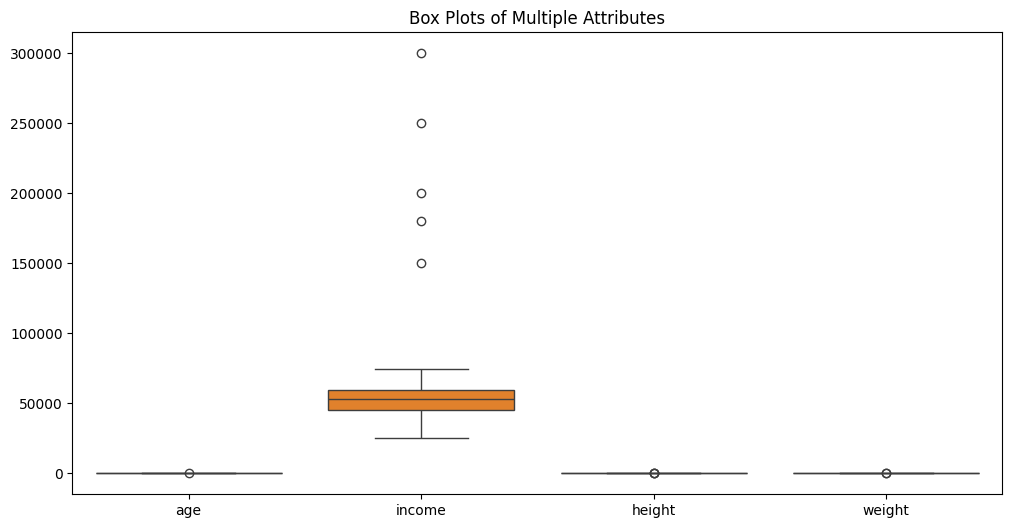

In [ ]:
# Create box plots for multiple numerical columns using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['age', 'income', 'height', 'weight']])
plt.title('Box Plots of Multiple Attributes')
plt.show()

## Outlier-with Z-score

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

In [ ]:
# Step 1: Calculate the Z-score for the 'income' column
z_scores = np.abs(stats.zscore(data['income'].dropna())) # Drop missing values for calculation

In [ ]:
# Step 2: Set the threshold for Z-score (commonly 3 or -3)
threshold = 3


In [ ]:
# Step 3: Identify the outliers
outliers = np.where(z_scores > threshold)

In [ ]:
# Display the indices of outliers
print("Outliers detected at indices:", outliers)

Outliers detected at indices: (array([96, 97, 98, 99]),)


In [ ]:
# Step 4: Optionally, you can view the outliers
outlier_values = data['income'].iloc[outliers]
print("Outlier values:", outlier_values)

Outlier values: 96    180000.0
97    200000.0
98    250000.0
99    300000.0
Name: income, dtype: float64


## Outlier-with IQR

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'income' column
Q1 = data['income'].quantile(0.25)
Q3 = data['income'].quantile(0.75)

In [ ]:
# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1


In [ ]:
# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Step 4: Identify the outliers in the 'income' column
outliers = data['income'][(data['income'] < lower_bound) | (data['income'] > upper_bound)]

In [ ]:
# Display the outliers in the 'income' column
print("Outliers in 'income' column:")
print(outliers)

Outliers in 'income' column:
95    150000.0
96    180000.0
97    200000.0
98    250000.0
99    300000.0
Name: income, dtype: float64


In [ ]:
# Step 5: Optionally, you can also display the lower and upper bounds for reference
print(f"\nLower bound: {lower_bound}, Upper bound: {upper_bound}")


Lower bound: 24197.78482684697, Upper bound: 81055.42075679763


## Replace outlier with mean

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Detect Outliers using Box Plot Statistics (IQR method)
Q1 = data['income'].quantile(0.25)
Q3 = data['income'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Calculate the bounds for outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Step 2: Identify the outliers
outliers = (data['income'] < lower_bound) | (data['income'] > upper_bound)

In [ ]:
# Step 3: Replace outliers with the mean
mean_value = data['income'].mean()
data.loc[outliers, 'income'] = mean_value

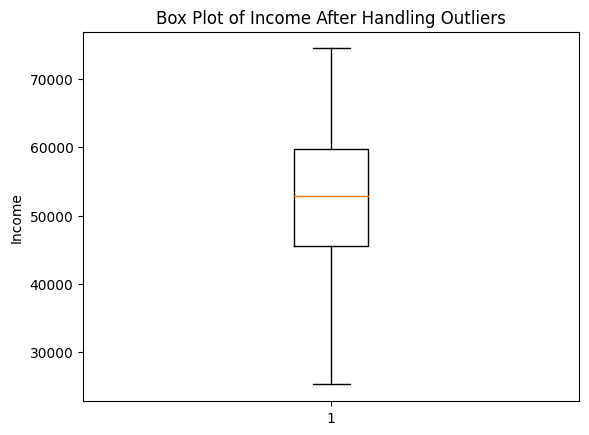

In [ ]:
# Step 4: Plot the box plot after imputing outliers
plt.boxplot(data['income'].dropna())
plt.title('Box Plot of Income After Handling Outliers')
plt.ylabel('Income')
plt.show()

## Replace outlier with log transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Apply log transformation to the 'income' column
# Ensure that all values are positive before applying log transformation
data['income_log'] = np.log(data['income'].clip(lower=1)) # clip to avoid log(0)

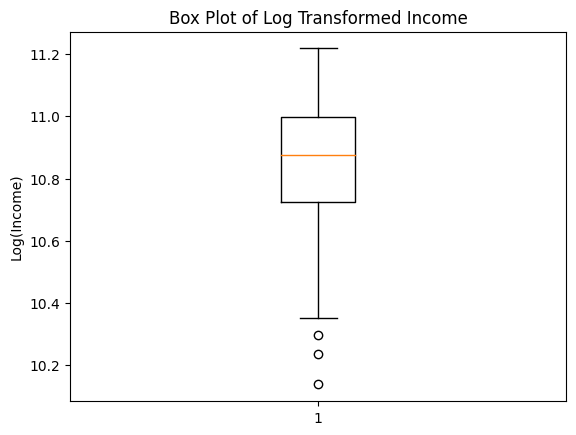

In [ ]:
# Step 2: Plot the box plot of the transformed 'income_log' column
plt.boxplot(data['income_log'].dropna())
plt.title('Box Plot of Log Transformed Income')
plt.ylabel('Log(Income)')
plt.show()

In [ ]:
# Step 3: Display the updated dataset
print(data[['income', 'income_log']])

          income  income_log
0   46154.444558   10.739749
1   60062.928092   11.003148
2   44231.081305   10.697183
3   58356.921121   10.974333
4   38702.931453   10.563671
..           ...         ...
95  59733.807283   10.997653
96  59733.807283   10.997653
97  59733.807283   10.997653
98  59733.807283   10.997653
99  59733.807283   10.997653

[100 rows x 2 columns]


## Histogram

In [ ]:
import matplotlib.pyplot as plt

(array([ 3.,  3.,  4., 12., 16., 22., 14., 17.,  6.,  3.]),
 array([25283.55499873, 30200.95147847, 35118.34795822, 40035.74443796,
        44953.1409177 , 49870.53739745, 54787.93387719, 59705.33035694,
        64622.72683668, 69540.12331642, 74457.51979617]),
 <BarContainer object of 10 artists>)

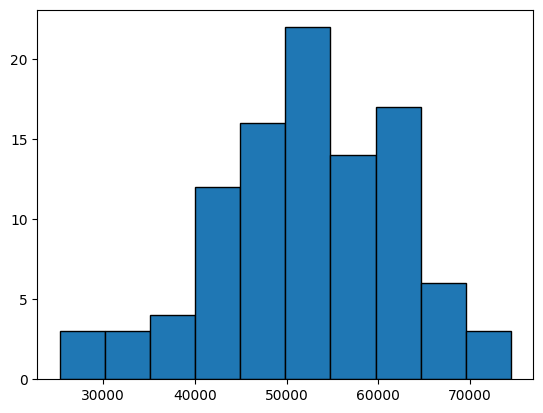

In [ ]:
# Step 1: Construct a histogram for the 'income' column
plt.hist(data['income'].dropna(), bins=10, edgecolor='black') # Drop missing values to avoid issues

Text(0, 0.5, 'Frequency')

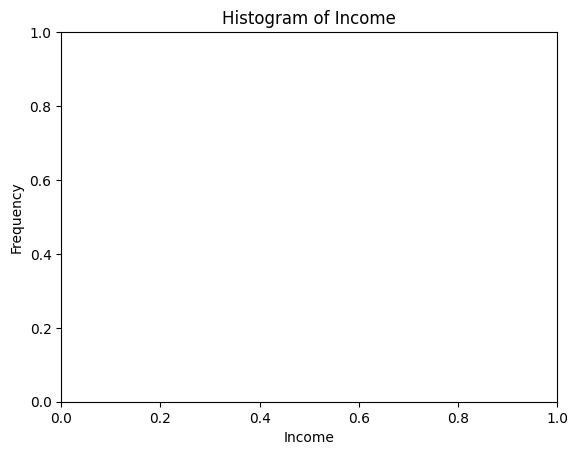

In [ ]:
# Step 2: Add titles and labels
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

In [ ]:
# Step 3: Show the plot
plt.show()